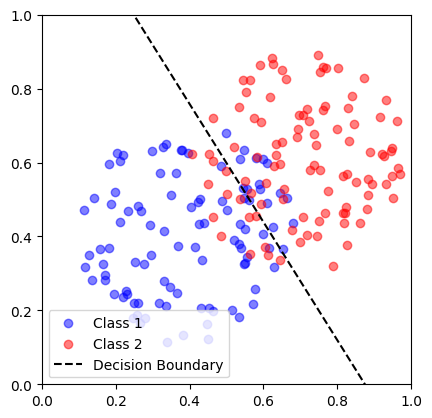

In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Define the center and radius of the circle
center = (0.4, 0.4)
radius = 0.3

np.random.seed(0)  # For reproducibility

# Generate random points within the circle for Class 1
theta1 = np.random.uniform(0, 2 * np.pi, size=100)
radius1 = np.sqrt(np.random.uniform(0, radius**2, size=100))
x1 = center[0] + radius1 * np.cos(theta1)
y1 = center[1] + radius1 * np.sin(theta1)

# Generate random points within the circle for Class 2 (shifted position)
theta2 = np.random.uniform(0, 2 * np.pi, size=100)
radius2 = np.sqrt(np.random.uniform(0, radius**2, size=100))
x2 = center[0] + 0.3 + radius2 * np.cos(theta2)
y2 = center[1] + 0.2 + radius2 * np.sin(theta2)

# Prepare data for Logistic Regression
X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
y = np.array([0] * 100 + [1] * 100)  # Labels for the classes

# Fit Logistic Regression model
model = LogisticRegression()
model.fit(X, y)

# Plot the points
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.scatter(x1, y1, color='blue', alpha=0.5, label='Class 1')
ax.scatter(x2, y2, color='red', alpha=0.5, label='Class 2')

# Set the limits of the plot
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Calculate the decision boundary line
# The decision boundary is where the model's prediction probability is 0.5
# which is where model.coef_[0][0] * x + model.coef_[0][1] * y + model.intercept_ = 0
# Rearranged, it becomes y = -(model.coef_[0][0] / model.coef_[0][1]) * x - (model.intercept_ / model.coef_[0][1])
slope = -model.coef_[0][0] / model.coef_[0][1]
intercept = -model.intercept_ / model.coef_[0][1]

# Generate x values and corresponding y values for the line
x_vals = np.linspace(0, 1, 100)
y_vals = slope * x_vals + intercept

# Plot the decision boundary line
ax.plot(x_vals, y_vals, 'k--', label='Decision Boundary')

# Add legend and show plot
ax.legend()
plt.show()
